# Exploratory Analysis: Bankruptcy

### IMPORTING LIBRARIES

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Null Values

There seem to be no null values. 

In [8]:
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


### Running Correlation Matrix on All Data

We were expecting more correlation between the variables however it seems like that is not the case

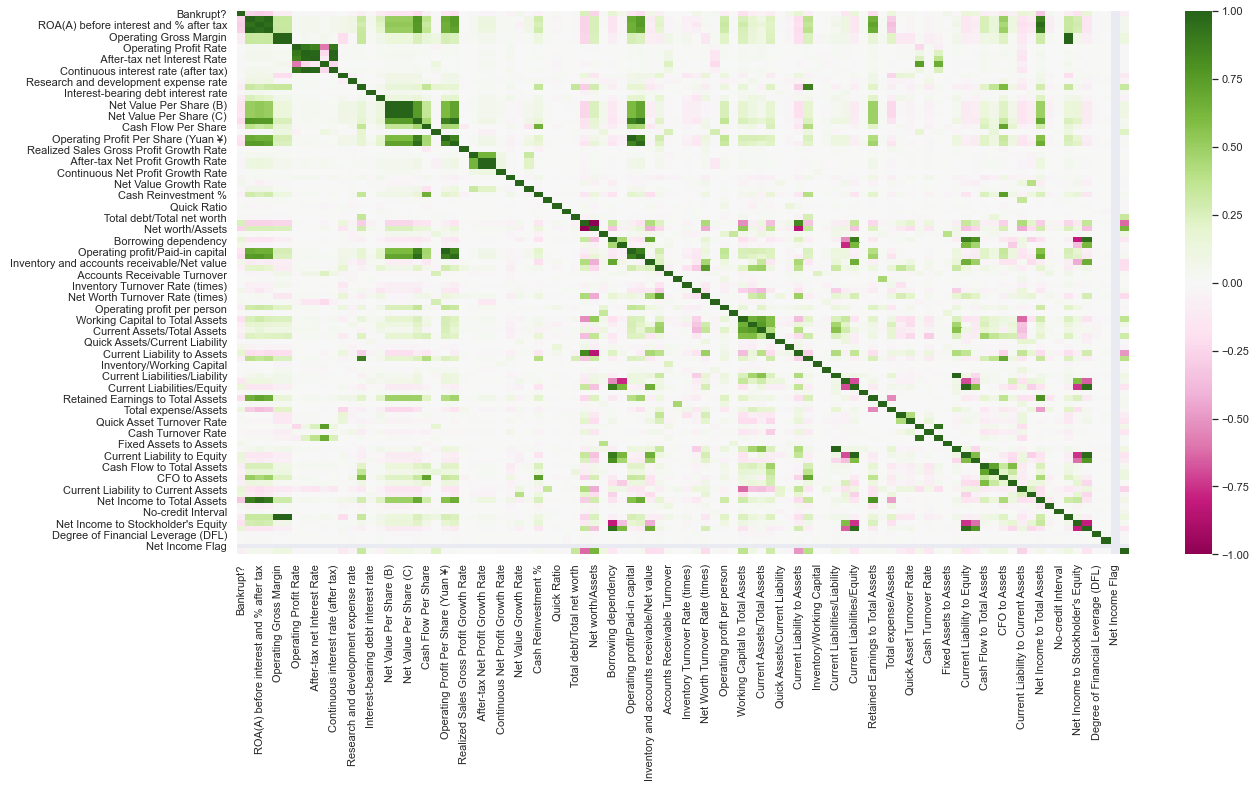

In [14]:

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap = "PiYG")
plt.show()

### Running VIF on the dataset and removing any variable with VIF >5

In [39]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.values.shape[1])]
vif["Features"] = df.columns
vif_5 = vif[vif["VIF Factor"]<5]
print(vif_5.round(1))

    VIF Factor                                           Features
0          1.3                                          Bankrupt?
11         1.3                             Operating Expense Rate
12         1.1              Research and development expense rate
14         1.0                Interest-bearing debt interest rate
15         1.3                                       Tax rate (A)
20         4.2                                Cash Flow Per Share
21         4.4                         Revenue Per Share (Yuan ¥)
24         1.0            Realized Sales Gross Profit Growth Rate
25         1.9                       Operating Profit Growth Rate
28         1.0                  Continuous Net Profit Growth Rate
29         1.1                            Total Asset Growth Rate
30         1.3                              Net Value Growth Rate
31         1.8               Total Asset Return Growth Rate Ratio
32         3.7                                Cash Reinvestment %
33        

C:\Users\niraj\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [40]:
reduced_data = df[vif_5["Features"]]

Wanted to see if there were any "categorical variables" other than bankrupt. It seems that liability-assests flag and net income flag may also be categorical

In [48]:
reduced_data.nunique()

Bankrupt?                                                 2
 Operating Expense Rate                                2966
 Research and development expense rate                 1536
 Interest-bearing debt interest rate                   1080
 Tax rate (A)                                          2488
 Cash Flow Per Share                                   1545
 Revenue Per Share (Yuan ¥)                            3807
 Realized Sales Gross Profit Growth Rate               5583
 Operating Profit Growth Rate                          6249
 Continuous Net Profit Growth Rate                     6270
 Total Asset Growth Rate                               1751
 Net Value Growth Rate                                 4502
 Total Asset Return Growth Rate Ratio                  2903
 Cash Reinvestment %                                   3599
 Current Ratio                                         6132
 Quick Ratio                                           6094
 Interest Expense Ratio                 

### Correlation Matrix with Reduced Dataset

Doesn't seem like there is much collinearity with the new dataset.

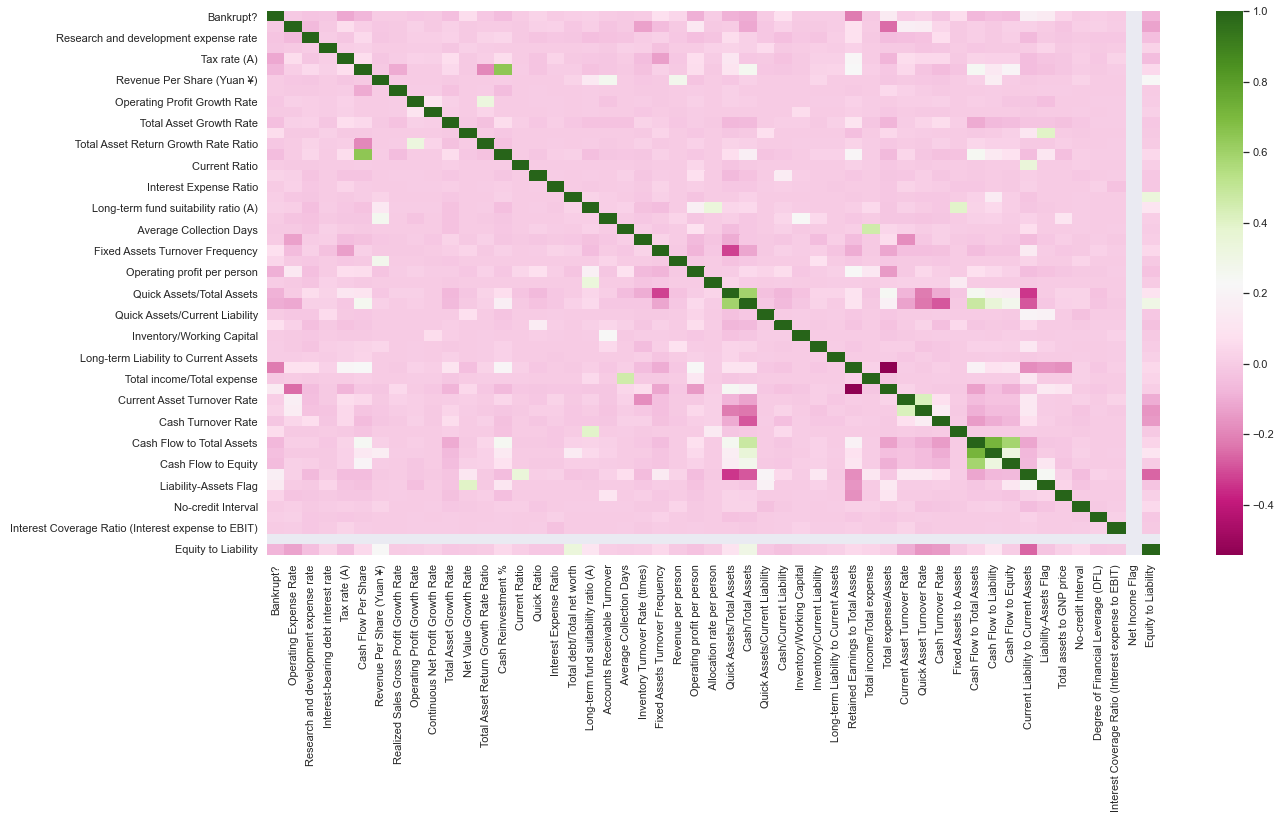

In [49]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= reduced_data.corr()
sns.heatmap(c,cmap = "PiYG")
plt.show()

51
